# Headline analysis

This notebook explores the most frequent significant words in headlines.

## Imports

In [1]:
import pandas as pd
from pandas.core.common import flatten
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [2]:
pd.set_option("max_colwidth", 0)

## Data sourcing

In [3]:
headlines = pd.read_csv("./data/processed_headlines.csv")

headlines.head()

,title,source,keywords
0,"GCSE results day 2023 LIVE: Pass grades fall for second year running in England, Wales and Northern Ireland - with 68.2% marked at 4/C",Daily Mail,gcse result day 2023 live pas grade fall second year run england wale northern ireland 68.2 mark 4/c
1,Wagner 'had full mobilisation plan if Prigozhin was killed' it is claimed as they vow revenge for 'assassination' - as MI6 chief says there are signs Putin 'took him out' in plane crash and if he's not dead 'he soon will be',Daily Mail,wagner had full mobilisation plan prigozhin kill claim vow revenge assassination mi6 chief say sign putin took plane crash dead he soon
2,Prince Harry WILL be in the UK on the anniversary of the Queen's death but will 'snub his family' - as it is revealed he faces having to ask King if he can stay at Frogmore Cottage,Daily Mail,prince harry anniversary queen death snub family reveal face ask king stay frogmore cottage
3,Wagner plane crash LIVE: Yevgeny Prigozhin's death risks retaliation in Russia after mercenary group threaten Vladimir Putin,Daily Mail,wagner plane crash live yevgeny prigozhin death risk retaliation russia mercenary group threaten vladimir putin
4,"Yevgeny Prigozhin was assassinated 'as a gift for Zelensky to celebrate Ukraine's victory day today', Putin's former spokesman claims",Daily Mail,yevgeny prigozhin assassinate as gift zelensky celebrate ukraine victory day today putin former spokesman claim


## Most frequent words

### Analysis

In [4]:
# Split the keywords strings into lists

headlines["keywords"] = headlines["keywords"].str.split(" ")

In [5]:
# Split the titles by source

dm = headlines[headlines["source"] == "Daily Mail"]
bbc = headlines[headlines["source"] == "BBC"]

In [6]:
# Flatten keyword lists

all_dm_keywords = flatten(dm["keywords"])
all_bbc_keywords = flatten(bbc["keywords"])

In [7]:
# Convert to series (makes them very countable)

all_dm_keywords = pd.Series(all_dm_keywords)
all_bbc_keywords = pd.Series(all_bbc_keywords)

# Then count them

dm_keyword_counts = all_dm_keywords.value_counts()
bbc_keyword_counts = all_bbc_keywords.value_counts()

[Text(0.5, 1.0, 'BBC')]

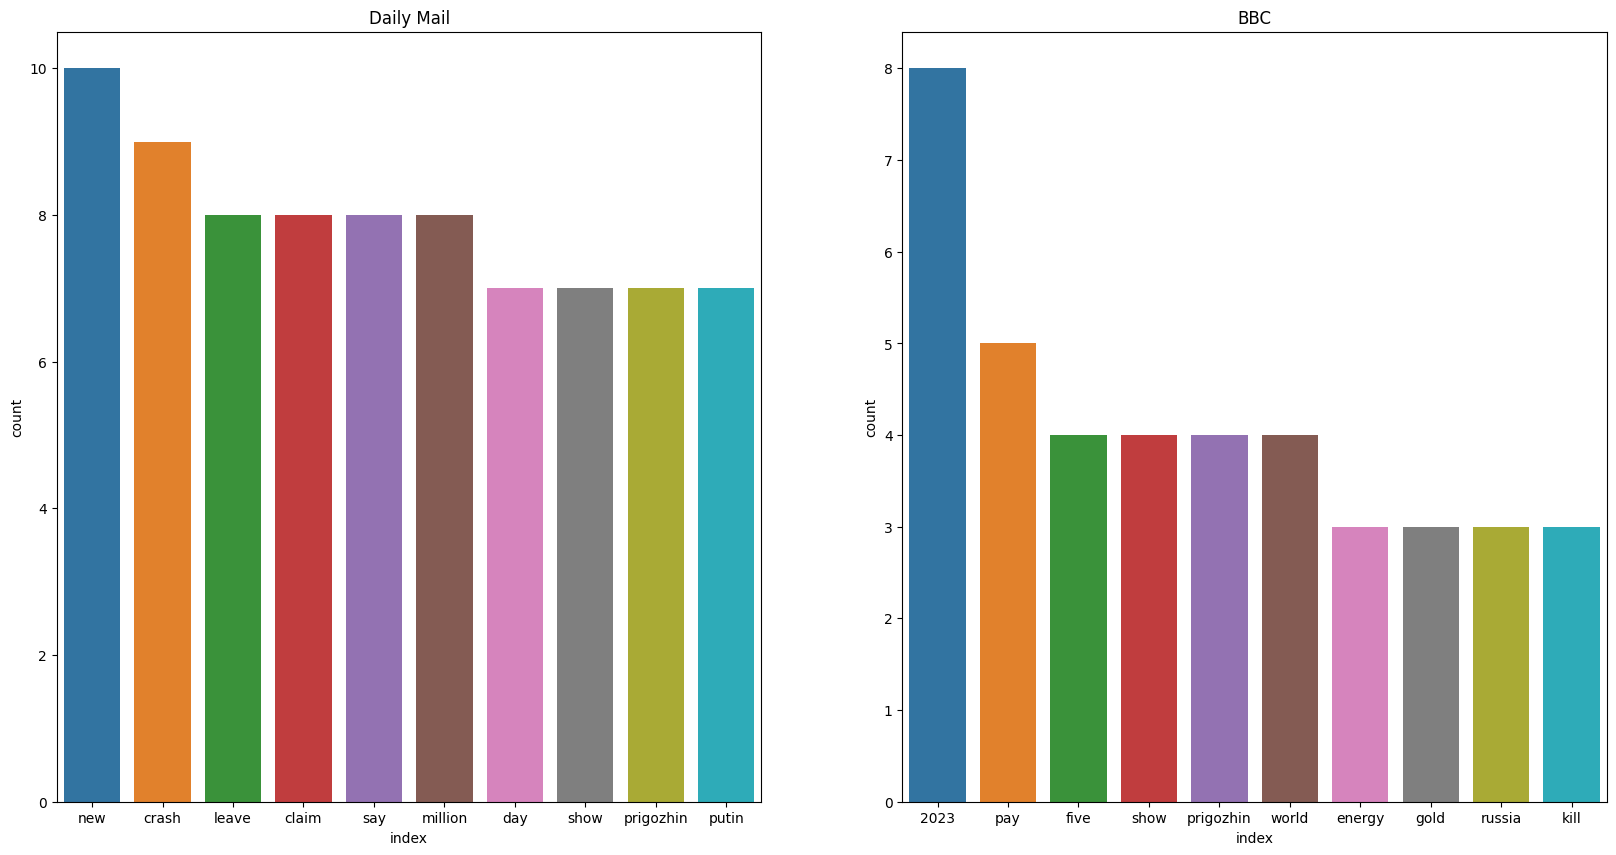

In [8]:
# Select the top ten of each

dm_top_ten = dm_keyword_counts.reset_index()[:10]
bbc_top_ten = bbc_keyword_counts.reset_index()[:10]

# Then graph them

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(dm_top_ten, x="index", y="count", ax=ax[0]).set(title='Daily Mail')
sns.barplot(bbc_top_ten, x="index", y="count", ax=ax[1]).set(title='BBC')